In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv(r'D:\MS\Forage\BCG - Data Science (PowerCo)\data_for_predictions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  14606 non-null  int64  
 1   id                                          14606 non-null  object 
 2   cons_12m                                    14606 non-null  float64
 3   cons_gas_12m                                14606 non-null  float64
 4   cons_last_month                             14606 non-null  float64
 5   forecast_cons_12m                           14606 non-null  float64
 6   forecast_discount_energy                    14606 non-null  float64
 7   forecast_meter_rent_12m                     14606 non-null  float64
 8   forecast_price_energy_off_peak              14606 non-null  float64
 9   forecast_price_energy_peak                  14606 non-null  float64
 10  forecast_p

In [4]:
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [5]:
# Data Preprocessing
df = df.drop(columns=['Unnamed: 0', 'id'] + [col for col in df.columns if col.startswith('channel_') or col.startswith('origin_up')]).dropna()

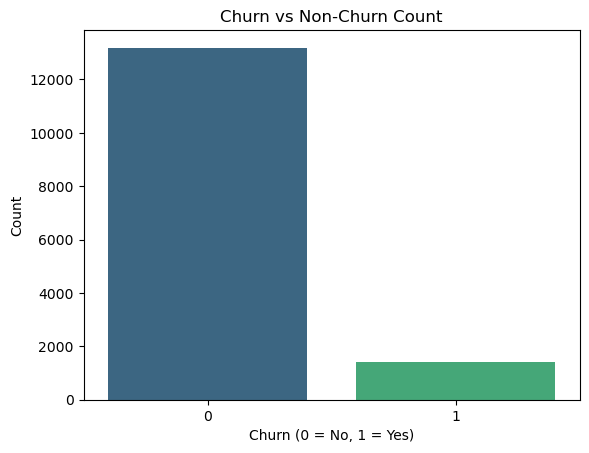

Class Distribution:
 churn
0    13187
1     1419
Name: count, dtype: int64


In [6]:
# Count of churn and non-churn instances
sns.countplot(data=df, x='churn', hue='churn', palette='viridis', legend=False)
plt.title('Churn vs Non-Churn Count')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

churn_counts = df['churn'].value_counts()
print("Class Distribution:\n", churn_counts)

In [7]:
# Features and Target
X = df.drop(columns=['churn'])
y = df['churn']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("SIMPLE RANDOM FOREST")
rf_simple = RandomForestClassifier(n_estimators=100, random_state=42)
rf_simple.fit(X_train_scaled, y_train)

SIMPLE RANDOM FOREST


RandomForestClassifier(random_state=42)

In [11]:
# Predictions
y_pred_simple = rf_simple.predict(X_test_scaled)
y_prob_simple = rf_simple.predict_proba(X_test_scaled)[:, 1]

Confusion Matrix (Simple RF):


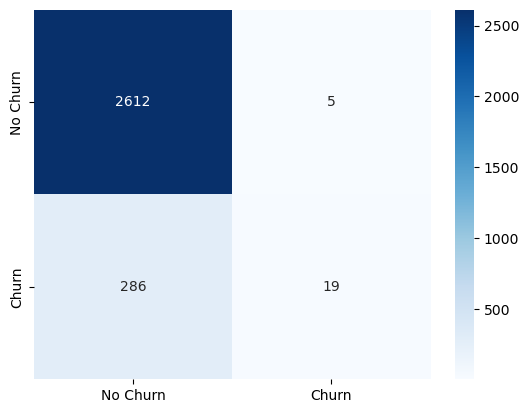

Classification Report (Simple RF):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.79      0.06      0.12       305

    accuracy                           0.90      2922
   macro avg       0.85      0.53      0.53      2922
weighted avg       0.89      0.90      0.86      2922



In [12]:
# Evaluation
print("Confusion Matrix (Simple RF):")
sns.heatmap(confusion_matrix(y_test, y_pred_simple), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.show()

print("Classification Report (Simple RF):")
print(classification_report(y_test, y_pred_simple))

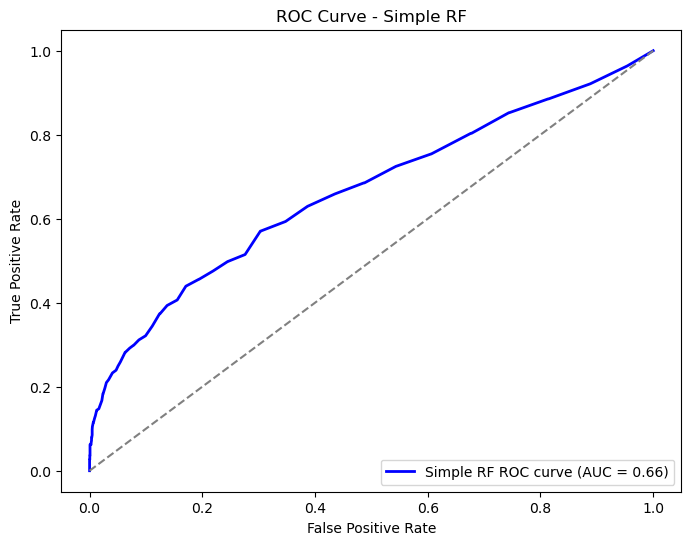

In [13]:
# ROC Curve (Simple RF)
fpr_simple, tpr_simple, _ = roc_curve(y_test, y_prob_simple)
roc_auc_simple = auc(fpr_simple, tpr_simple)
plt.figure(figsize=(8, 6))
plt.plot(fpr_simple, tpr_simple, color='blue', lw=2, label=f'Simple RF ROC curve (AUC = {roc_auc_simple:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Simple RF')
plt.legend(loc='lower right')
plt.show()

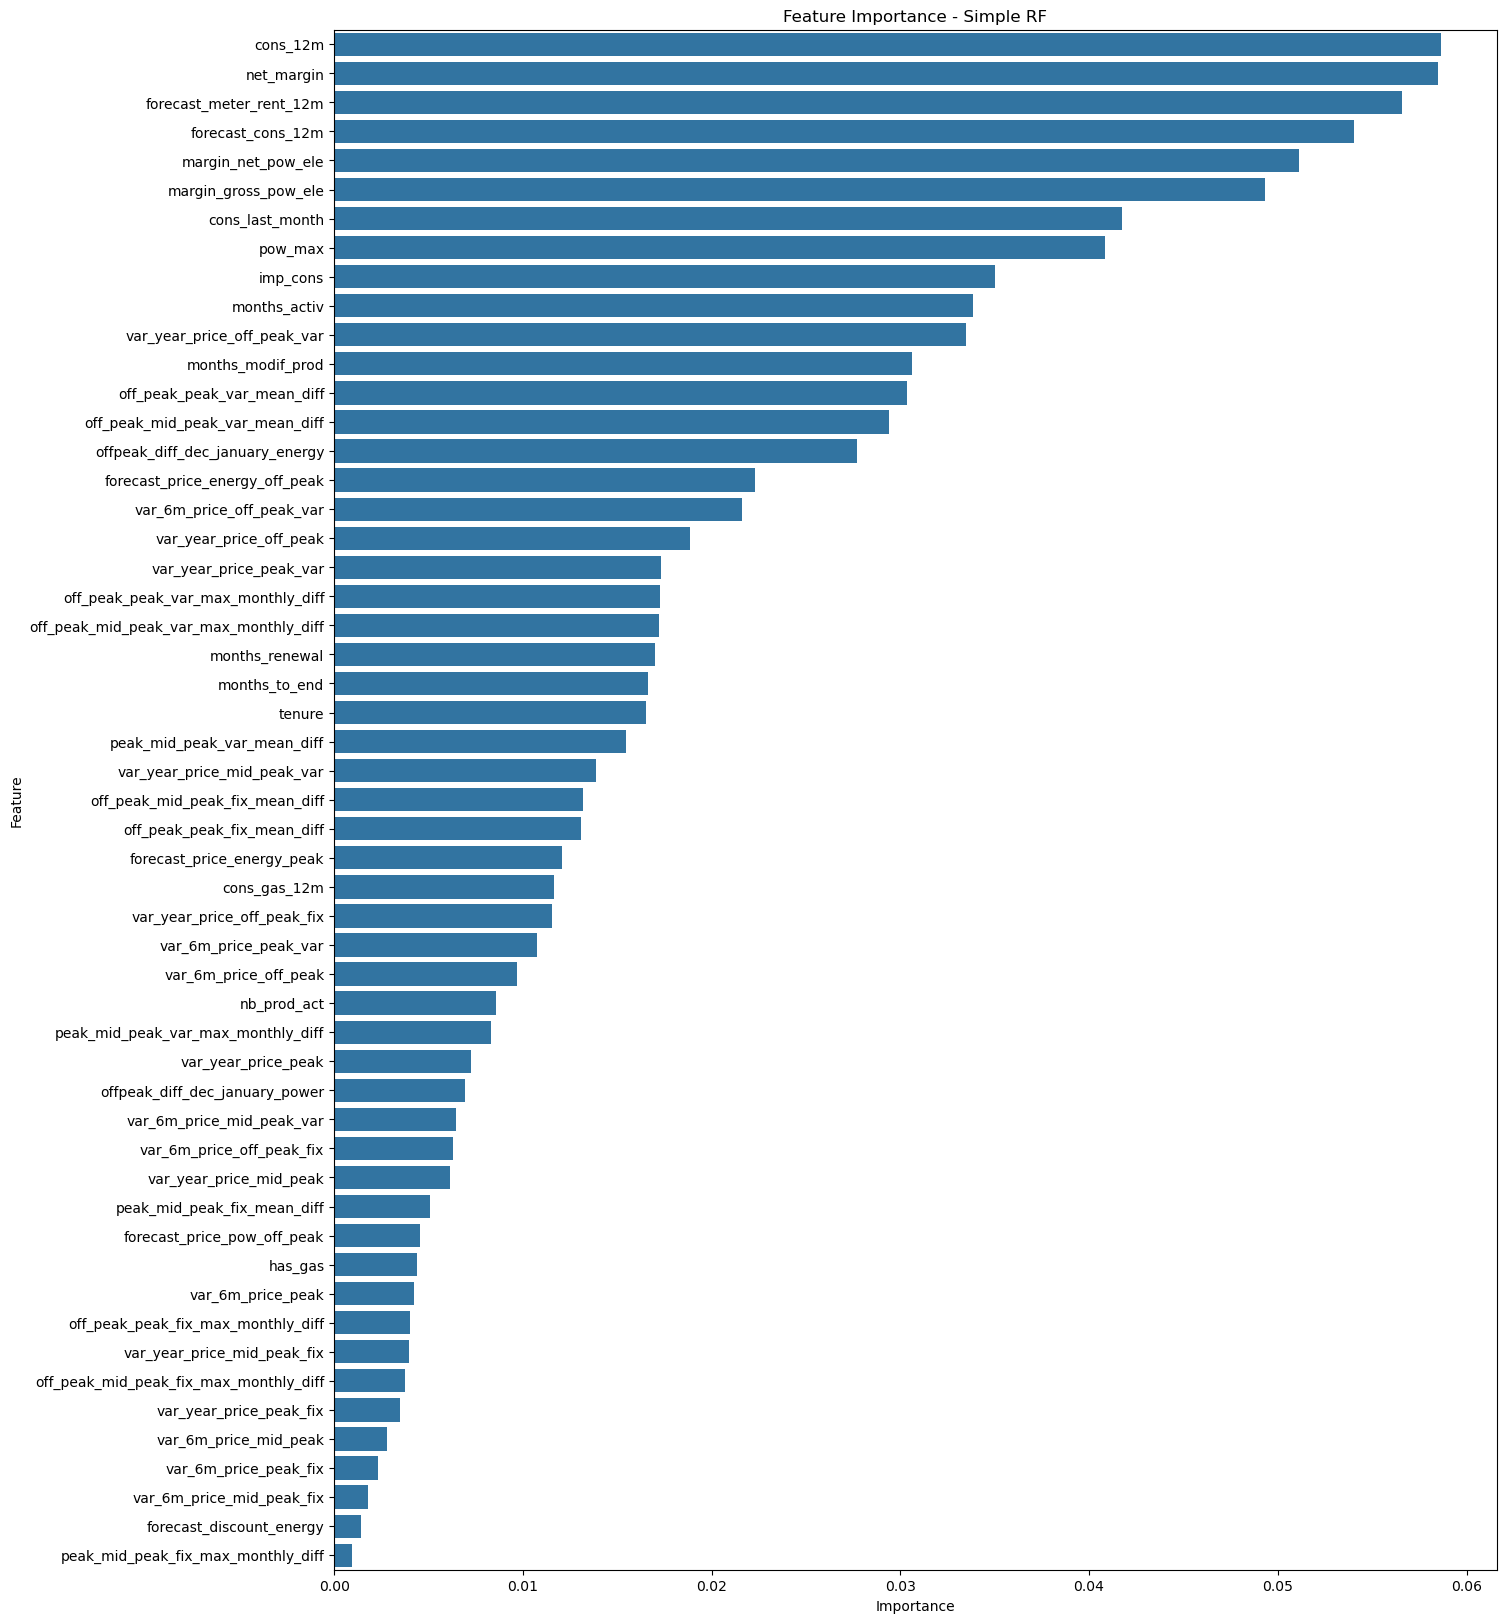

In [14]:
# Feature Importance (Simple RF)
feature_importances_simple = rf_simple.feature_importances_
features = X.columns
feature_df_simple = pd.DataFrame({'Feature': features, 'Importance': feature_importances_simple}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(15, 20))
sns.barplot(x='Importance', y='Feature', data=feature_df_simple)
plt.title('Feature Importance - Simple RF')
plt.show()

**The Simple Random Forest model shows that cons_12m (12-month consumption) and net_margin (profit margin) are important factors for churn. Customers with high cons_12m might churn due to high usage costs, so offering discounts or loyalty programs can help. Customers with low net_margin may not feel valued, so providing personalized offers or improving their overall experience can increase retention. Focusing on these factors can help reduce churn.**

In [15]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [16]:
print("SMOTE + RANDOM FOREST")
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

SMOTE + RANDOM FOREST


RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred_smote = rf_smote.predict(X_test_scaled)
y_prob_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

Confusion Matrix (SMOTE RF):


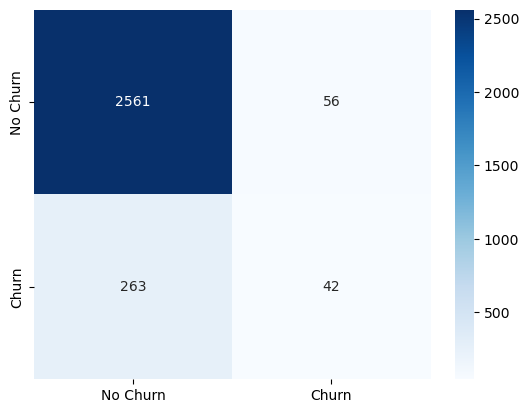

Classification Report (SMOTE RF):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2617
           1       0.43      0.14      0.21       305

    accuracy                           0.89      2922
   macro avg       0.67      0.56      0.57      2922
weighted avg       0.86      0.89      0.86      2922



In [18]:
# Evaluation
print("Confusion Matrix (SMOTE RF):")
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.show()

print("Classification Report (SMOTE RF):")
print(classification_report(y_test, y_pred_smote))

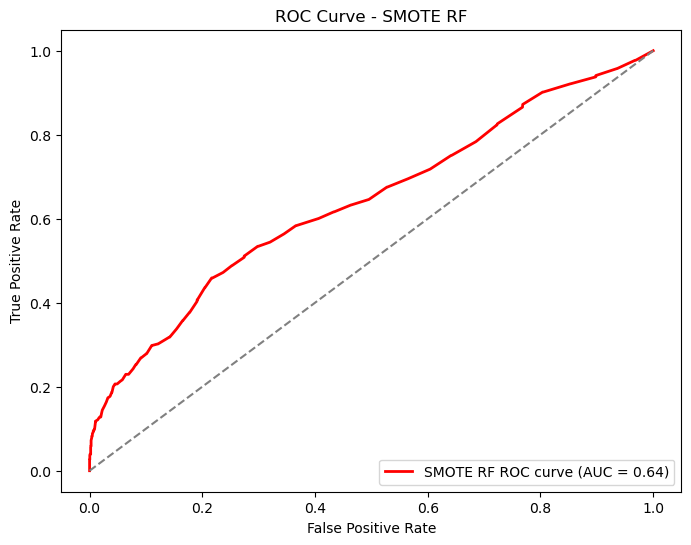

In [19]:
# ROC Curve (SMOTE RF)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='red', lw=2, label=f'SMOTE RF ROC curve (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SMOTE RF')
plt.legend(loc='lower right')
plt.show()

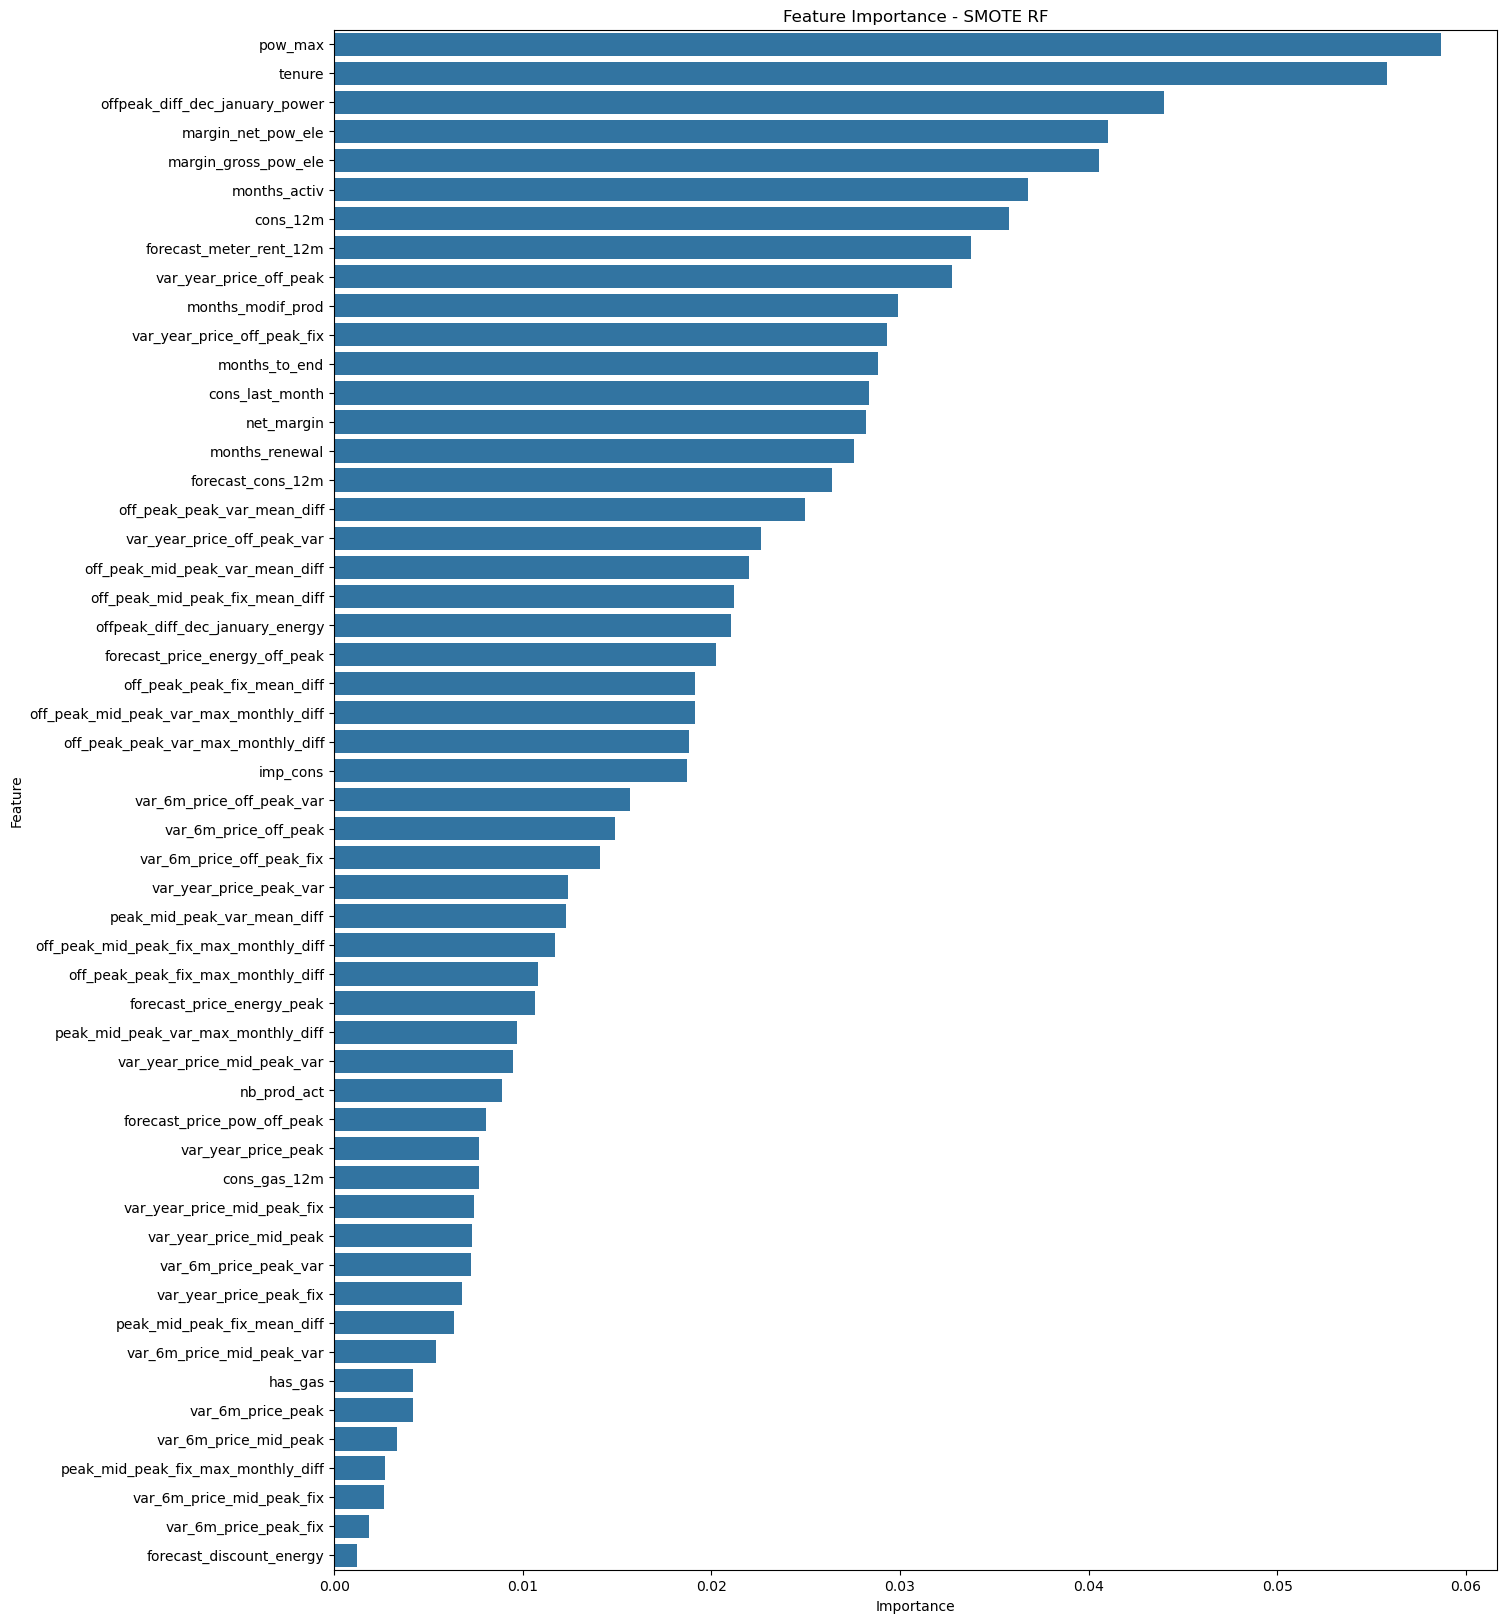

In [20]:
# Feature Importance (SMOTE RF)
feature_importances_smote = rf_smote.feature_importances_
feature_df_smote = pd.DataFrame({'Feature': features, 'Importance': feature_importances_smote}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(15, 20))
sns.barplot(x='Importance', y='Feature', data=feature_df_smote)
plt.title('Feature Importance - SMOTE RF')
plt.show()

**The SMOTE + Random Forest model shows that pow_max (maximum power usage) and tenure (time with the company) are important factors for churn. Customers with high pow_max might leave because of high costs, so offering personalized pricing, energy-saving tips, or better support can help. Customers with low tenure are more likely to leave because they haven’t been with the company long, so improving onboarding, offering early rewards, and collecting feedback can keep them happy. Focusing on customers with high pow_max and low tenure can reduce churn effectively.**

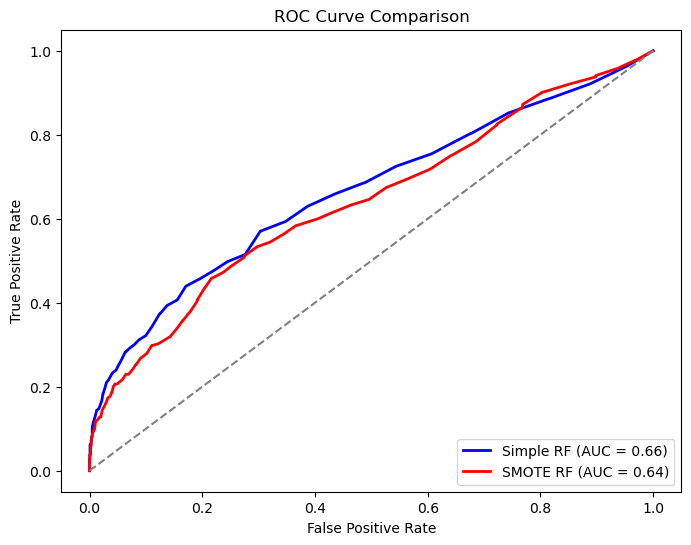

In [21]:
# ROC Curve Comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_simple, tpr_simple, color='blue', lw=2, label=f'Simple RF (AUC = {roc_auc_simple:.2f})')
plt.plot(fpr_smote, tpr_smote, color='red', lw=2, label=f'SMOTE RF (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()